In [1]:
# Imports
import pandas as pd
import numpy as np
import pickle
from datetime import datetime
from shapely import geometry
import matplotlib.pyplot as plt
import geopandas
import shapely.wkt

pd.options.display.max_colwidth = 50

In [2]:
# Read FIR Codes
df = pd.read_csv('data/NA_FIR_Codes.csv')

# Read Vertices
df2 = pd.read_csv('data/vertices_20201027.csv')

# Read Spaceports
df3 = pd.read_csv ('data/spaceports_20201027.csv')

# Read pickle file with topics and augmented text
df4 = pd.read_pickle("data/allData.pkl")

# Read Polygon File
df5 = pd.read_csv('data/polygon_20201027.csv')

# Read Basemap Shapefile
states = geopandas.read_file('data/bound_p.shx')

In [3]:
# One off testing and tuning

#time = '10/05/2017  08:00:00 AM' #349
#time = '2/20/2016  7:40:00 PM' #230
#time = '4/22/2020  7:30:30 PM' #514
#time = '4/2/2018  8:30:38 PM' #391
#time = '11/16/2017  2:52:00 AM' #364
#time = '12/5/2018  6:16:16 PM' #438
time = '10/17/2018  4:15:00 AM' #431 has JAXA launch in it as well (t=6)
#time = '9/24/2017  5:49:47 AM' #347
#time = '8/6/2019  11:23:00 PM' #475 has a russian launch as well (t=6)
#time = '3/26/2020  8:18:00 PM' #512
#time = '3/18/2017  11:44:00 PM' #305
#time = '8/16/2016  11:31:00 PM' #262
#time = '5/26/2016  9:40:00 PM' #248
#time = '2/22/2018  2:17:00 PM' #385
#time = '3/2/2019  12:00:00 AM' #450
#time = '11/11/2016  6:30:33 PM' #275
#time = '10/30/2017  7:34:00 PM' #358
#time = '10/30/2017  12:57:00 AM' #357
#time = '1/27/2020  1:40:00 AM' #504

date_time_obj = datetime.strptime(time, '%m/%d/%Y %H:%M:%S %p')

In [4]:
# Date filter
filterA = df4[(df4['POSSIBLE_START_DATE'] <= time) & (df4['POSSIBLE_END_DATE'] >= time)]

In [5]:
# Altitude filter
filterB = filterA[filterA['MAX_ALT'] >= 50000 | filterA['MAX_ALT'].isna()]

In [6]:
# Keyword filter
filterC = filterB[(filterB['TEXT'].str.contains(r'(?:\s|^)rocket(?:\s|$)') == True) | 
                      (filterB['TEXT'].str.contains(r'(?:\s|^)space(?:\s|$)') == True) |
                      (filterB['TEXT'].str.contains(r'(?:\s|^)launch(?:\s|$)') == True) |
                      (filterB['TEXT'].str.contains(r'(?:\s|^)airspace restricted(?:\s|$)') == True) |
                      (filterB['TEXT'].str.contains(r'(?:\s|^)missile(?:\s|$)') == True) |
                      (filterB['TEXT'].str.contains(r'(?:\s|^)canaveral(?:\s|$)') == True) |
                      (filterB['TEXT'].str.contains(r'(?:\s|^)kennedy(?:\s|$)') == True) |
                      (filterB['TEXT'].str.contains(r'(?:\s|^)nasa(?:\s|$)') == True) |
                      (filterB['TEXT'].str.contains(r'(?:\s|^)unlimited(?:\s|$)') == True)]

In [7]:
# FIR Code filter
filterD = filterC[filterC['LOCATION_CODE'].isin(df['FIR']) | filterC['LOCATION_CODE'].isna()]

# US Airport Code filter
#filterD = filterC[filterC['LOCATION_CODE'].isin(df['FIR']) | filterC['LOCATION_CODE'].isna() | filterC['LOCATION_CODE'].isin(df2['locid'])]

In [8]:
# Topic filter
filterE = filterD[(filterD['TOPIC'] == 0) | (filterD['TOPIC'] == 7)]

In [9]:
# Print out
filterE[['TOPIC','NOTAM_REC_ID', 'LOCATION_CODE', 'TEXT']]

,TOPIC,NOTAM_REC_ID,LOCATION_CODE,TEXT
1086188,0,1086869,ZDC,airspace restricted area (followed by identifi...
1086189,0,1086870,ZDC,airspace restricted area (followed by identifi...
1086190,0,1086871,ZDC,airspace restricted area (followed by identifi...
1087466,0,1088147,ZLC,airspace restricted area (followed by identifi...
1090286,0,1090971,ZSE,airspace restricted area (followed by identifi...
1090291,0,1090976,ZAB,airspace restricted area (followed by identifi...
1090292,0,1090977,ZSE,airspace restricted area (followed by identifi...
1090300,0,1090985,ZSE,airspace restricted area (followed by identifi...
1091380,0,1092065,ZAB,airspace restricted area (followed by identifi...
1091389,0,1092074,ZAB,airspace restricted area (followed by identifi...


In [10]:
# Creates WKT Polygons
def getPolygons(id_list):
    all_polys = {}

    for poly_id in id_list:
        tmp = df2[df2['POLYGON_ID'] == poly_id]

        long = tmp['LONGITUDE'].astype(str).values
        lat = tmp['LATITUDE'].astype(str).values

        pointList = list(zip(tmp['LONGITUDE'], tmp['LATITUDE']))

        if len(pointList) == 1:
            poly = geometry.Point([pointList[0][0], pointList[0][1]])
        elif len(pointList) == 2:
            poly = geometry.LineString([[p[0], p[1]] for p in pointList])
        else:
            poly = geometry.Polygon([[p[0], p[1]] for p in pointList])

        all_polys[poly_id] = poly
        
    return all_polys

# Gets Poylgon ID from NOTAM ID
def getIds(rec_ids, poly_df):
    id_list = []
    for row in rec_ids['NOTAM_REC_ID']:
        for item in poly_df[poly_df['NOTAM_REC_ID'] == row]['POLYGON_ID'].values:
            id_list.append(item)
            
    return id_list

In [11]:
# Get IDs for Candidate NOTAMs
id_list = getIds(filterE, df5)

# Get Polygons for Candidate NOTAMs
P = getPolygons(id_list)

(-162.0, -60.0, 10.0, 50.0)

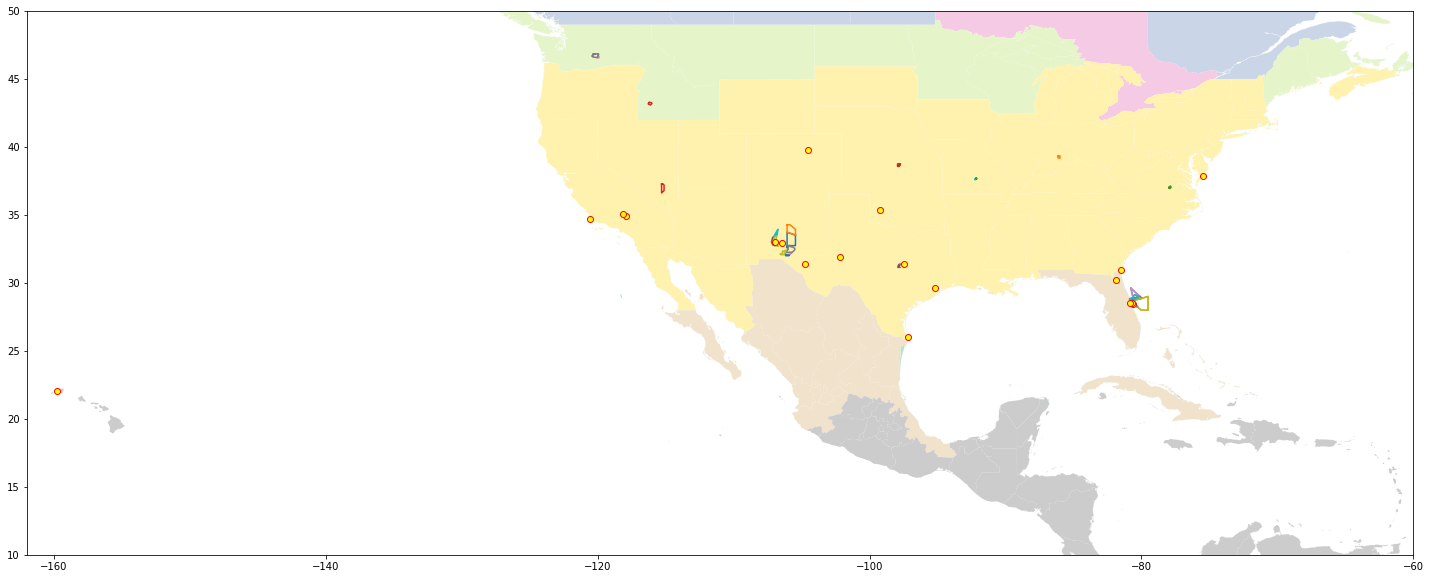

In [12]:
# Plot Base Map
states.plot(cmap='Pastel2', figsize=(30, 10))

# Plot NOTAM Polygons
for item in P.values():
    #if P:
     #   continue
    if item.geom_type != 'Polygon':
        plt.plot(*item.xy)
    else:
        x,y = item.exterior.xy
        plt.plot(x,y)

# Plot Spaceport Locations
plt.plot(df3['LONGITUDE'], df3['LATITUDE'], marker="o", markeredgecolor="red", markerfacecolor="yellow", linestyle="None")

# Set Zoom
#plt.axis([-83, -78, 27, 30])
plt.axis([-162, -60, 10, 50])